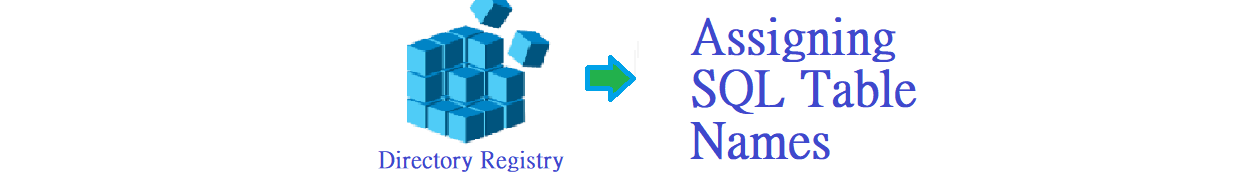

In [1]:
import pandas as pd
df_import_directories = pd.read_excel('c:/working_directory/excel/import_directory_registry.xlsx') 
df_import_directories.head(1000)

,directory,directory_table_name
0,Y:/_Kaleida_Input/,Y:/_Kaleida_Input/
1,Y:/_Kaleida_Input/Access,Y:/_Kaleida_Input/Access
2,Y:/_Kaleida_Input/ADP,Y:/_Kaleida_Input/ADP
3,Y:/_Kaleida_Input/ADP\Daily Time Card,Y:/_Kaleida_Input/ADP\Daily Time Card
4,Y:/_Kaleida_Input/ADP\Employee Census,Y:/_Kaleida_Input/ADP\Employee Census
5,Y:/_Kaleida_Input/Available_Slots,Y:/_Kaleida_Input/Available_Slots
6,Y:/_Kaleida_Input/Available_Slots_Past,Y:/_Kaleida_Input/Available_Slots_Past
7,Y:/_Kaleida_Input/Calendar,Y:/_Kaleida_Input/Calendar
8,Y:/_Kaleida_Input/DailyAppointments,Y:/_Kaleida_Input/DailyAppointments
9,Y:/_Kaleida_Input/Future Surgeries,Y:/_Kaleida_Input/Future Surgeries


## Customization - Special Formulas for GPPC table name creation

In [2]:
def get_directory_table_name(directory_name):
    table_name = 'unknown_' + directory_name.lower().replace(' ','_').replace('/','_').replace(':','_').replace('kalieda','gppc')
    dir_name = directory_name.lower()
    
# Start with the names the GPPC explicitly says not to LOAD
    if dir_name.find('patientinformation') > -1:
        table_name = 'x NO LOAD TABLE - GPPC NEVER USES'  
    elif dir_name.find('patient_info') > -1:
        table_name = 'x NO LOAD TABLE - GPPC NEVER USES'          
    elif dir_name.find('adp') > -1:
        table_name = 'x NO LOAD TABLE - GPPC NEVER USES'  
    elif dir_name.find('reference - visits') > -1:
        table_name = 'x NO LOAD TABLE - GPPC NEVER USES'  
    elif dir_name.find('budgeted wrvu') > -1:
        table_name = 'x NO LOAD TABLE - GPPC NEVER USES'           
    elif dir_name.find('access') > -1:
        table_name = 'access'            
    elif dir_name.find('card') > -1:
        table_name = 'time_card'        
    elif dir_name.find('appointment types') > -1:
        table_name = 'appointment_type'  
    elif dir_name.find('ty_–_test') > -1:
        table_name = 'provider_specialty_test'     
    elif dir_name.find('ty – test') > -1:
        table_name = 'provider_specialty_test'
    elif dir_name.find('specialty – test') > -1:
        table_name = 'provider_specialty_test' 
    elif (dir_name.find('specialty') > -1) and (dir_name.find('test') > -1):
         table_name = 'provider_specialty_test'    
    elif dir_name.find('surgicalappointment') > -1:
        table_name = 'appointment_surgical'         
    elif dir_name.find('specialty_test') > -1:
        table_name = 'provider_specialty_test'            
    elif dir_name.find('lty–test') > -1:
        table_name = 'provider_specialty_test'        
    elif dir_name.find('slots_past') > -1:
        table_name = 'available_slot_past'
    elif dir_name.find('reference - cpt_test') > -1:
        table_name = 'cpt_procedure_code_test'           
    elif dir_name.find('reference - cpt') > -1:
        table_name = 'cpt_procedure_code'     
    elif dir_name.find('slot') > -1:
        table_name = 'available_slot'   
    elif dir_name.find('card') > -1:
        table_name = 'time_card'    
    elif dir_name.find('census') > -1:
        table_name = 'employee_census'   
    elif dir_name.find('visits') > -1:
        table_name = 'visit'   
    elif dir_name.find('cpt') > -1:
        table_name = 'procedure_code'    
    elif dir_name.find('icd') > -1:
        table_name = 'diagnosis_code'           
    elif dir_name.find('adujstments') > -1:
        table_name = 'adjustments'    
    elif dir_name.find('hx') > -1:
        table_name = 'historical'   
    elif dir_name.find('appointment') > -1:
        table_name = 'appointment'           
    elif dir_name.find('surgical') > -1:
        table_name = 'surgical'  
    elif dir_name.find('quarter_sort') > -1:
        table_name = 'quarter_sort'     
    elif dir_name.find('locations and ad') > -1:
        table_name = 'location_address'             
    elif dir_name.find(' location') > -1:
        table_name = 'location'    
    elif dir_name.find('sort_month') > -1:
        table_name = 'sort_month'           
    elif dir_name.find('hx') > -1:
        table_name = 'historical'   
    elif dir_name.find('appointment') > -1:
        table_name = 'appointment_type'   
    elif dir_name.find('specialty code') > -1:
        table_name = 'specialty_code'   
    elif dir_name.find('superbills') > -1:
        table_name = 'super_bill'    
    elif dir_name.find('weekday sort order') > -1:
        table_name = 'weekday_sort_order'      
    elif dir_name.find('rcm_productivity_detail') > -1:
        table_name = 'rcm_productivity_detail'              
    elif dir_name.find('future surgeries') > -1:
        table_name = 'future_surgery'   
    elif dir_name.find('legacy_mrn') > -1:
        table_name = 'legacy_mrn'   
    elif dir_name.find('zip') > -1:
        table_name = 'postal_location'    
    elif dir_name.find('contents - data integrity') > -1:
        table_name = 'table_of_contents_data_integrity'         
    elif dir_name.find('contents') > -1:
        table_name = 'table_of_contents'   
    elif dir_name.find('holidays') > -1:
        table_name = 'holiday'
    elif dir_name.find('employee roster') > -1:
        table_name = 'employee_roster'   
    elif dir_name.find('cpd') > -1:
        table_name = 'procedure_code'    
    elif dir_name.find('icd') > -1:
        table_name = 'diagnosis'   
    elif dir_name.find('email link') > -1:
        table_name = 'email_link'        
    elif dir_name.find('calendar') > -1:
        table_name = 'calendar'  
    elif dir_name.find('rcm_productivity') > -1:
        table_name = 'rcm_productivity'
    elif dir_name.find('access') > -1:
        table_name = 'access'   
    elif dir_name.find('cpt') > -1:
        table_name = 'procedure_code'    
    elif dir_name.find('icd') > -1:
        table_name = 'diagnosis'   
    elif dir_name.find('referral') > -1:
        table_name = 'referral'
    elif dir_name.find('patient_info') > -1:
        table_name = 'patient'        
    elif dir_name.find('dx') > -1:
        table_name = 'diagnosis'   
    elif dir_name.find('pos') > -1:
        table_name = 'place_of_service'    
    elif dir_name.find('dx') > -1:
        table_name = 'diagnosis'            
    elif dir_name.find('specialty target') > -1:
        table_name = 'specialty_target'  
    elif dir_name.find('age group sort order') > -1:
        table_name = 'age_group_sort_order'        
    elif dir_name.find('resource provider') > -1:
        table_name = 'resource_provider'    
    elif dir_name.find('rcm_productivity_detail') > -1:
        table_name = 'rcm_productivity_detail'     
    elif dir_name.find('specialty – test') > -1:
        table_name = 'provider_specialty_test'           
    elif dir_name.find('provider_specialty – test') > -1:
        table_name = 'provider_specialty_test'          
    elif dir_name.find('provider_specialty') > -1:
        table_name = 'provider_specialty'   
    elif dir_name.find('referring doctor') > -1:
        table_name = 'referring_doctor'   
    elif dir_name.find('referring doctor') > -1:
        table_name = 'referring_doctor'    
    elif dir_name.find('insurance groupings') > -1:
        table_name = 'insurance_group'            
    elif dir_name.find('time sort') > -1:
        table_name = 'time_sort' 
    elif dir_name.find('third_next_available') > -1:
        table_name = 'third_next_available' 
    elif dir_name.find('main18under') > -1:
        table_name = 'patient_information'        
    return table_name
 
developing_and_testing = True  
if developing_and_testing:
    test_result = get_directory_table_name('Access')
    status = f'\nTesting function: get_directory_table_name result: {test_result}'      
 

In [3]:
# Persist the dataset 
df_import_directories['table_name'] = df_import_directories.apply(lambda x: get_directory_table_name(x['directory']), axis=1)
df_import_directories.to_excel('c:/working_directory/excel/import_directory_table_registry.xlsx', index = False)
# Read the persisted dataset in to ensure its persisted   
df_import_directories = pd.read_excel('c:/working_directory/excel/import_directory_table_registry.xlsx')
df_import_directories[['directory','table_name']].head(1000)


,directory,table_name
0,Y:/_Kaleida_Input/,unknown_y___kaleida_input_
1,Y:/_Kaleida_Input/Access,access
2,Y:/_Kaleida_Input/ADP,x NO LOAD TABLE - GPPC NEVER USES
3,Y:/_Kaleida_Input/ADP\Daily Time Card,x NO LOAD TABLE - GPPC NEVER USES
4,Y:/_Kaleida_Input/ADP\Employee Census,x NO LOAD TABLE - GPPC NEVER USES
5,Y:/_Kaleida_Input/Available_Slots,available_slot
6,Y:/_Kaleida_Input/Available_Slots_Past,available_slot_past
7,Y:/_Kaleida_Input/Calendar,calendar
8,Y:/_Kaleida_Input/DailyAppointments,appointment
9,Y:/_Kaleida_Input/Future Surgeries,future_surgery


In [4]:
# import the libraries we need
import pandas as pd
import sqlalchemy
# Read the persisted dataset in to ensure its persisted   
df_import_directory_table_registry = pd.read_excel('c:/working_directory/excel/import_directory_table_registry.xlsx')
df_import_directory = df_import_directory_table_registry[['table_name', 'directory']].head(1000)
df_import_directory.sort_values(by=['table_name','directory'])

,table_name,directory
1,access,Y:/_Kaleida_Input/Access
16,adjustments,Y:/_Kaleida_Input/RCM_Adujstments
20,age_group_sort_order,Y:/_Kaleida_Input/Reference - Age Group Sort O...
8,appointment,Y:/_Kaleida_Input/DailyAppointments
50,appointment_surgical,Y:/_Kaleida_Input/SurgicalAppointmentSummar2Da...
21,appointment_type,Y:/_Kaleida_Input/Reference - Appointment Types
5,available_slot,Y:/_Kaleida_Input/Available_Slots
6,available_slot_past,Y:/_Kaleida_Input/Available_Slots_Past
7,calendar,Y:/_Kaleida_Input/Calendar
24,cpt_procedure_code,Y:/_Kaleida_Input/Reference - CPT
